Inspiration of this notebook: a CGP Grey video about how machines learn

In [1]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastai.vision.all import *

In [2]:
def search_images(term, max_images=30):
  return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [3]:
%%bash

if [ -d images ]; then
    rm -r images
fi

In [4]:
from time import sleep
import shutil

path = Path("images")

categories = {
    'bee': 'images of bees',
    'three': 'images of number 3',
    'tree': 'images of trees',
    'humvee': 'images of humvees',
}

for category, search_term in categories.items():
  dest = path / category
  shutil.rmtree(dest, ignore_errors=True)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(search_term))
  resize_images(dest, max_size=400, dest=dest)
  sleep(10)

/root/.cache/pypoetry/virtualenvs/bee-or-three-jOM-MOio-py3.10/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

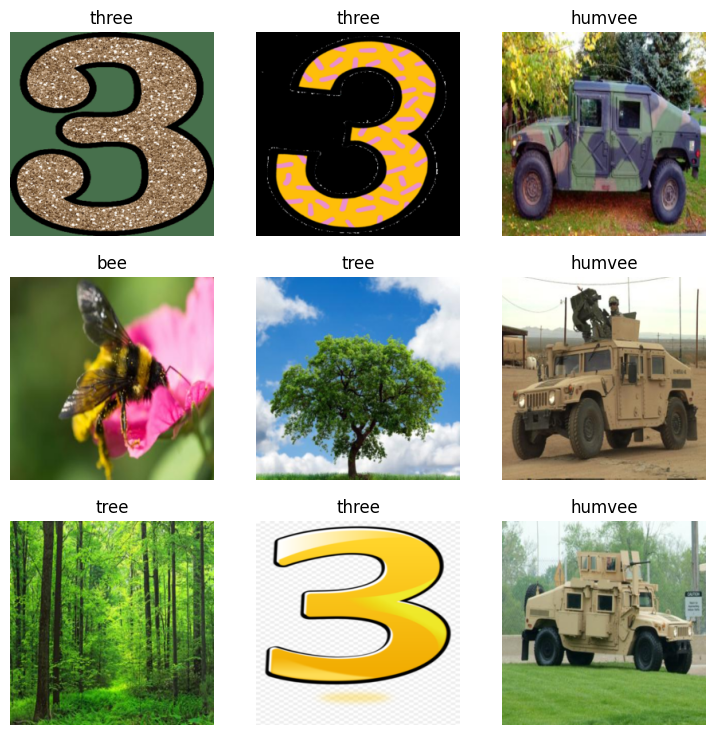

In [6]:
# dls = DataBlock(
#     blocks=(ImageBlock, CategoryBlock),
#     get_items=get_image_files,
#     splitter=RandomSplitter(valid_pct=0.25, seed=42),
#     get_y=parent_label,
#     item_tfms=[Resize(256, method='squish')]
# ).dataloaders(path, bs=32)

dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path),
    valid_pct=0.25, label_func=parent_label,
    item_tfms=[Resize(256, method='squish')],
    bs=32
)

dls.show_batch(max_n=9)

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

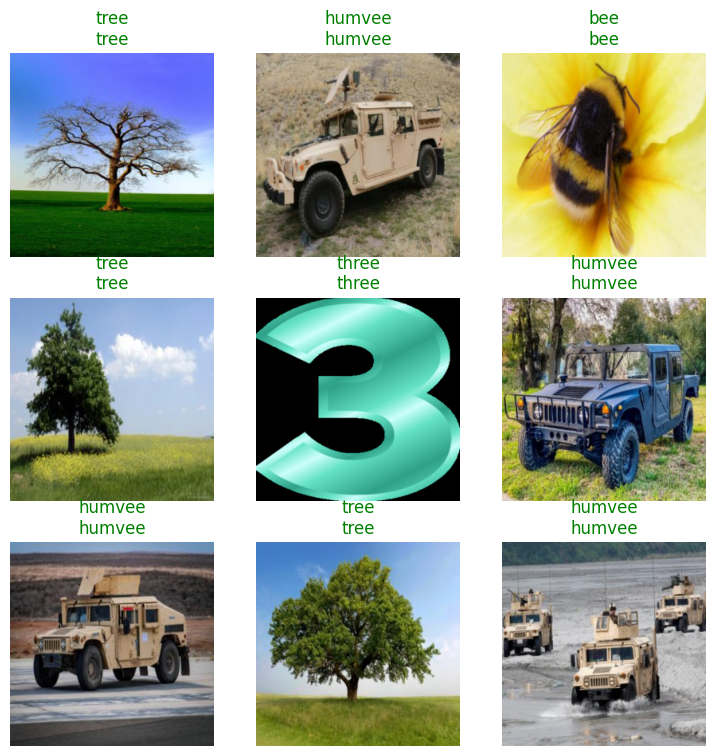

In [8]:
learn.show_results()

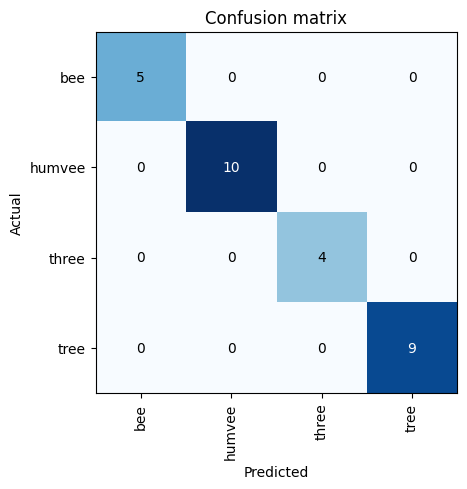

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

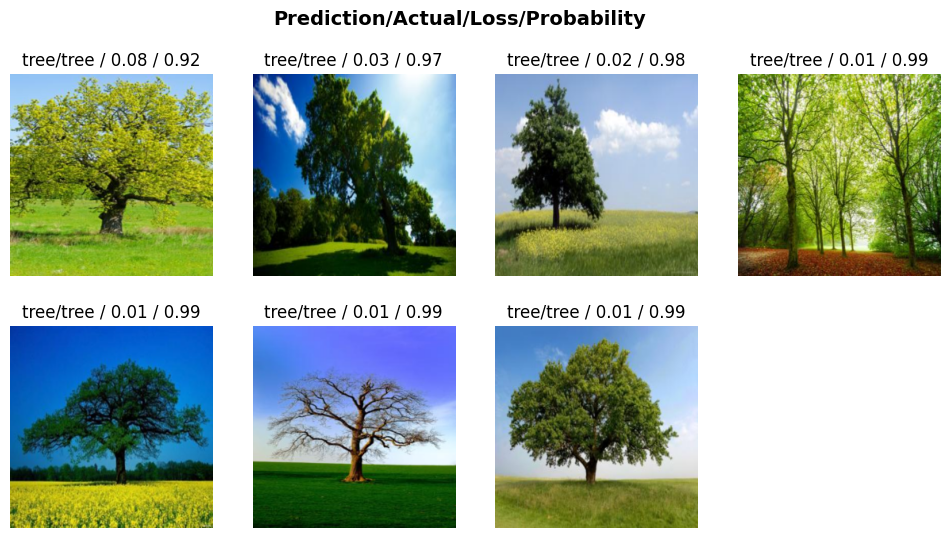

In [10]:
interp.plot_top_losses(7)

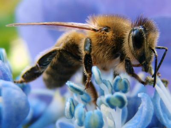

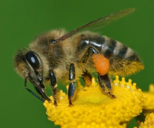

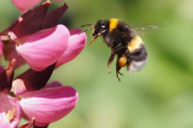

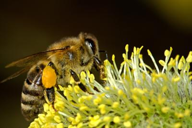

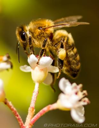

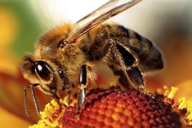

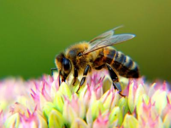

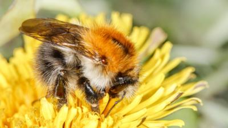

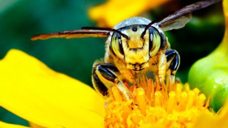

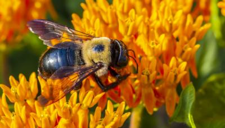

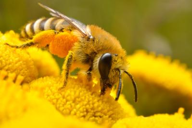

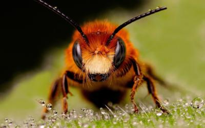

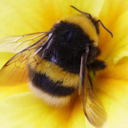

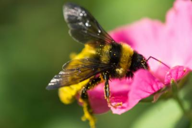

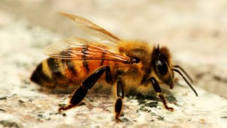

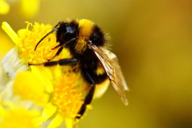

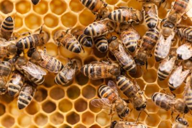

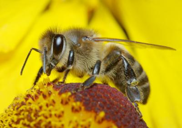

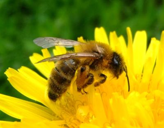

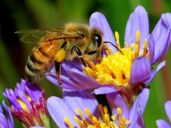

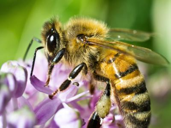

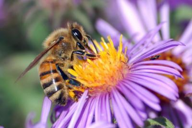

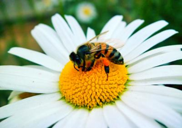

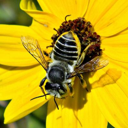

In [11]:
from fastai.vision.widgets import ImageClassifierCleaner

cleaner = ImageClassifierCleaner(learn)
cleaner

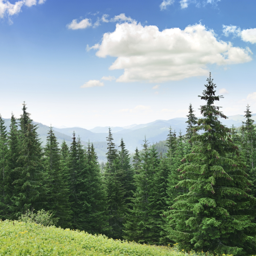

In [12]:
from fastdownload import download_url

urls = search_images('pine tree', max_images=1)
dest = 'img.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

In [13]:
img, _, probs = learn.predict(PILImage.create(dest))
img, [f"{prob:.4f}" for prob in probs]

('tree', ['0.0008', '0.0073', '0.0001', '0.9918'])

In [15]:
learn.export('model.pkl')